In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

In [2]:
raw = pd.read_csv('../Data/Walmart.csv')

In [3]:
len(raw)

6435

In [4]:
raw.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [5]:
raw.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
raw.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [7]:
raw.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
raw['Year'] = raw.Date.apply(lambda x: x.split('-')[2])

In [9]:
raw['Month'] = raw.Date.apply(lambda x: x.split('-')[1])

In [14]:
raw['Date'] = pd.to_datetime(raw.Date, infer_datetime_format=True)

In [17]:
raw['weekday'] = raw.Date.dt.weekday

In [18]:
raw.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,wekkday,weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02,6,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02,3,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,4,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,4,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03,0,0


<AxesSubplot: ylabel='Frequency'>

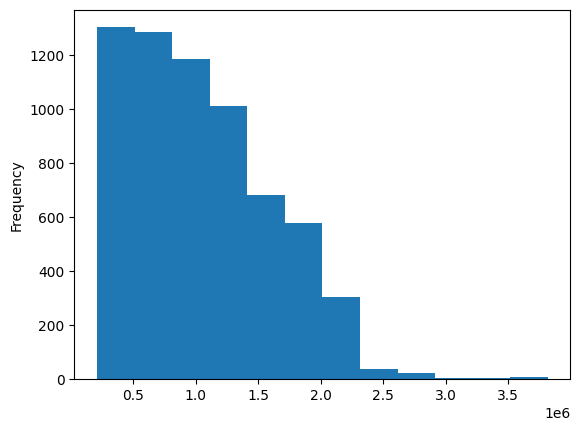

In [12]:
raw['Weekly_Sales'].plot.hist(bins=12)

In [20]:
raw.nunique().sort_values()

Holiday_Flag       2
Year               3
wekkday            7
weekday            7
Month             12
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

<AxesSubplot: xlabel='Weekly_Sales', ylabel='Count'>

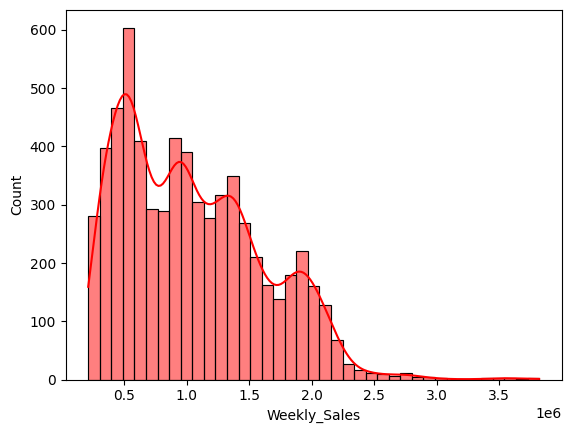

In [39]:
sns.histplot(raw["Weekly_Sales"], color='r', kde=True)

/var/folders/qf/t3jxt78d1834r_5jj9zh6s4c0000gn/T/ipykernel_11744/1514132975.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw['Weekly_Sales'], color='r', hist_kws=dict(edgecolor='black', linewidth=2), bins=30)


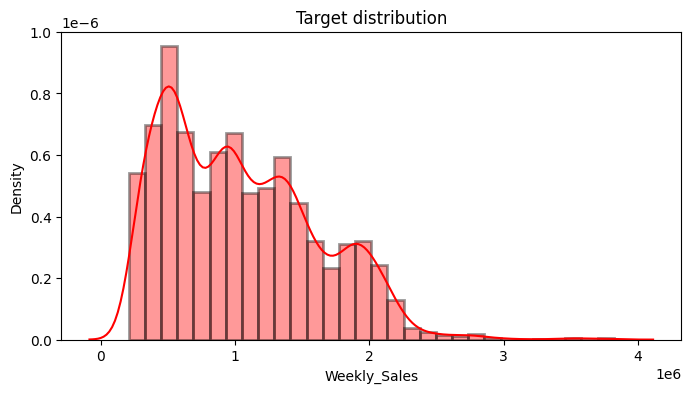

In [28]:
plt.figure(figsize=[8,4])
sns.distplot(raw['Weekly_Sales'], color='r', hist_kws=dict(edgecolor='black', linewidth=2), bins=30)
plt.title('Target distribution')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


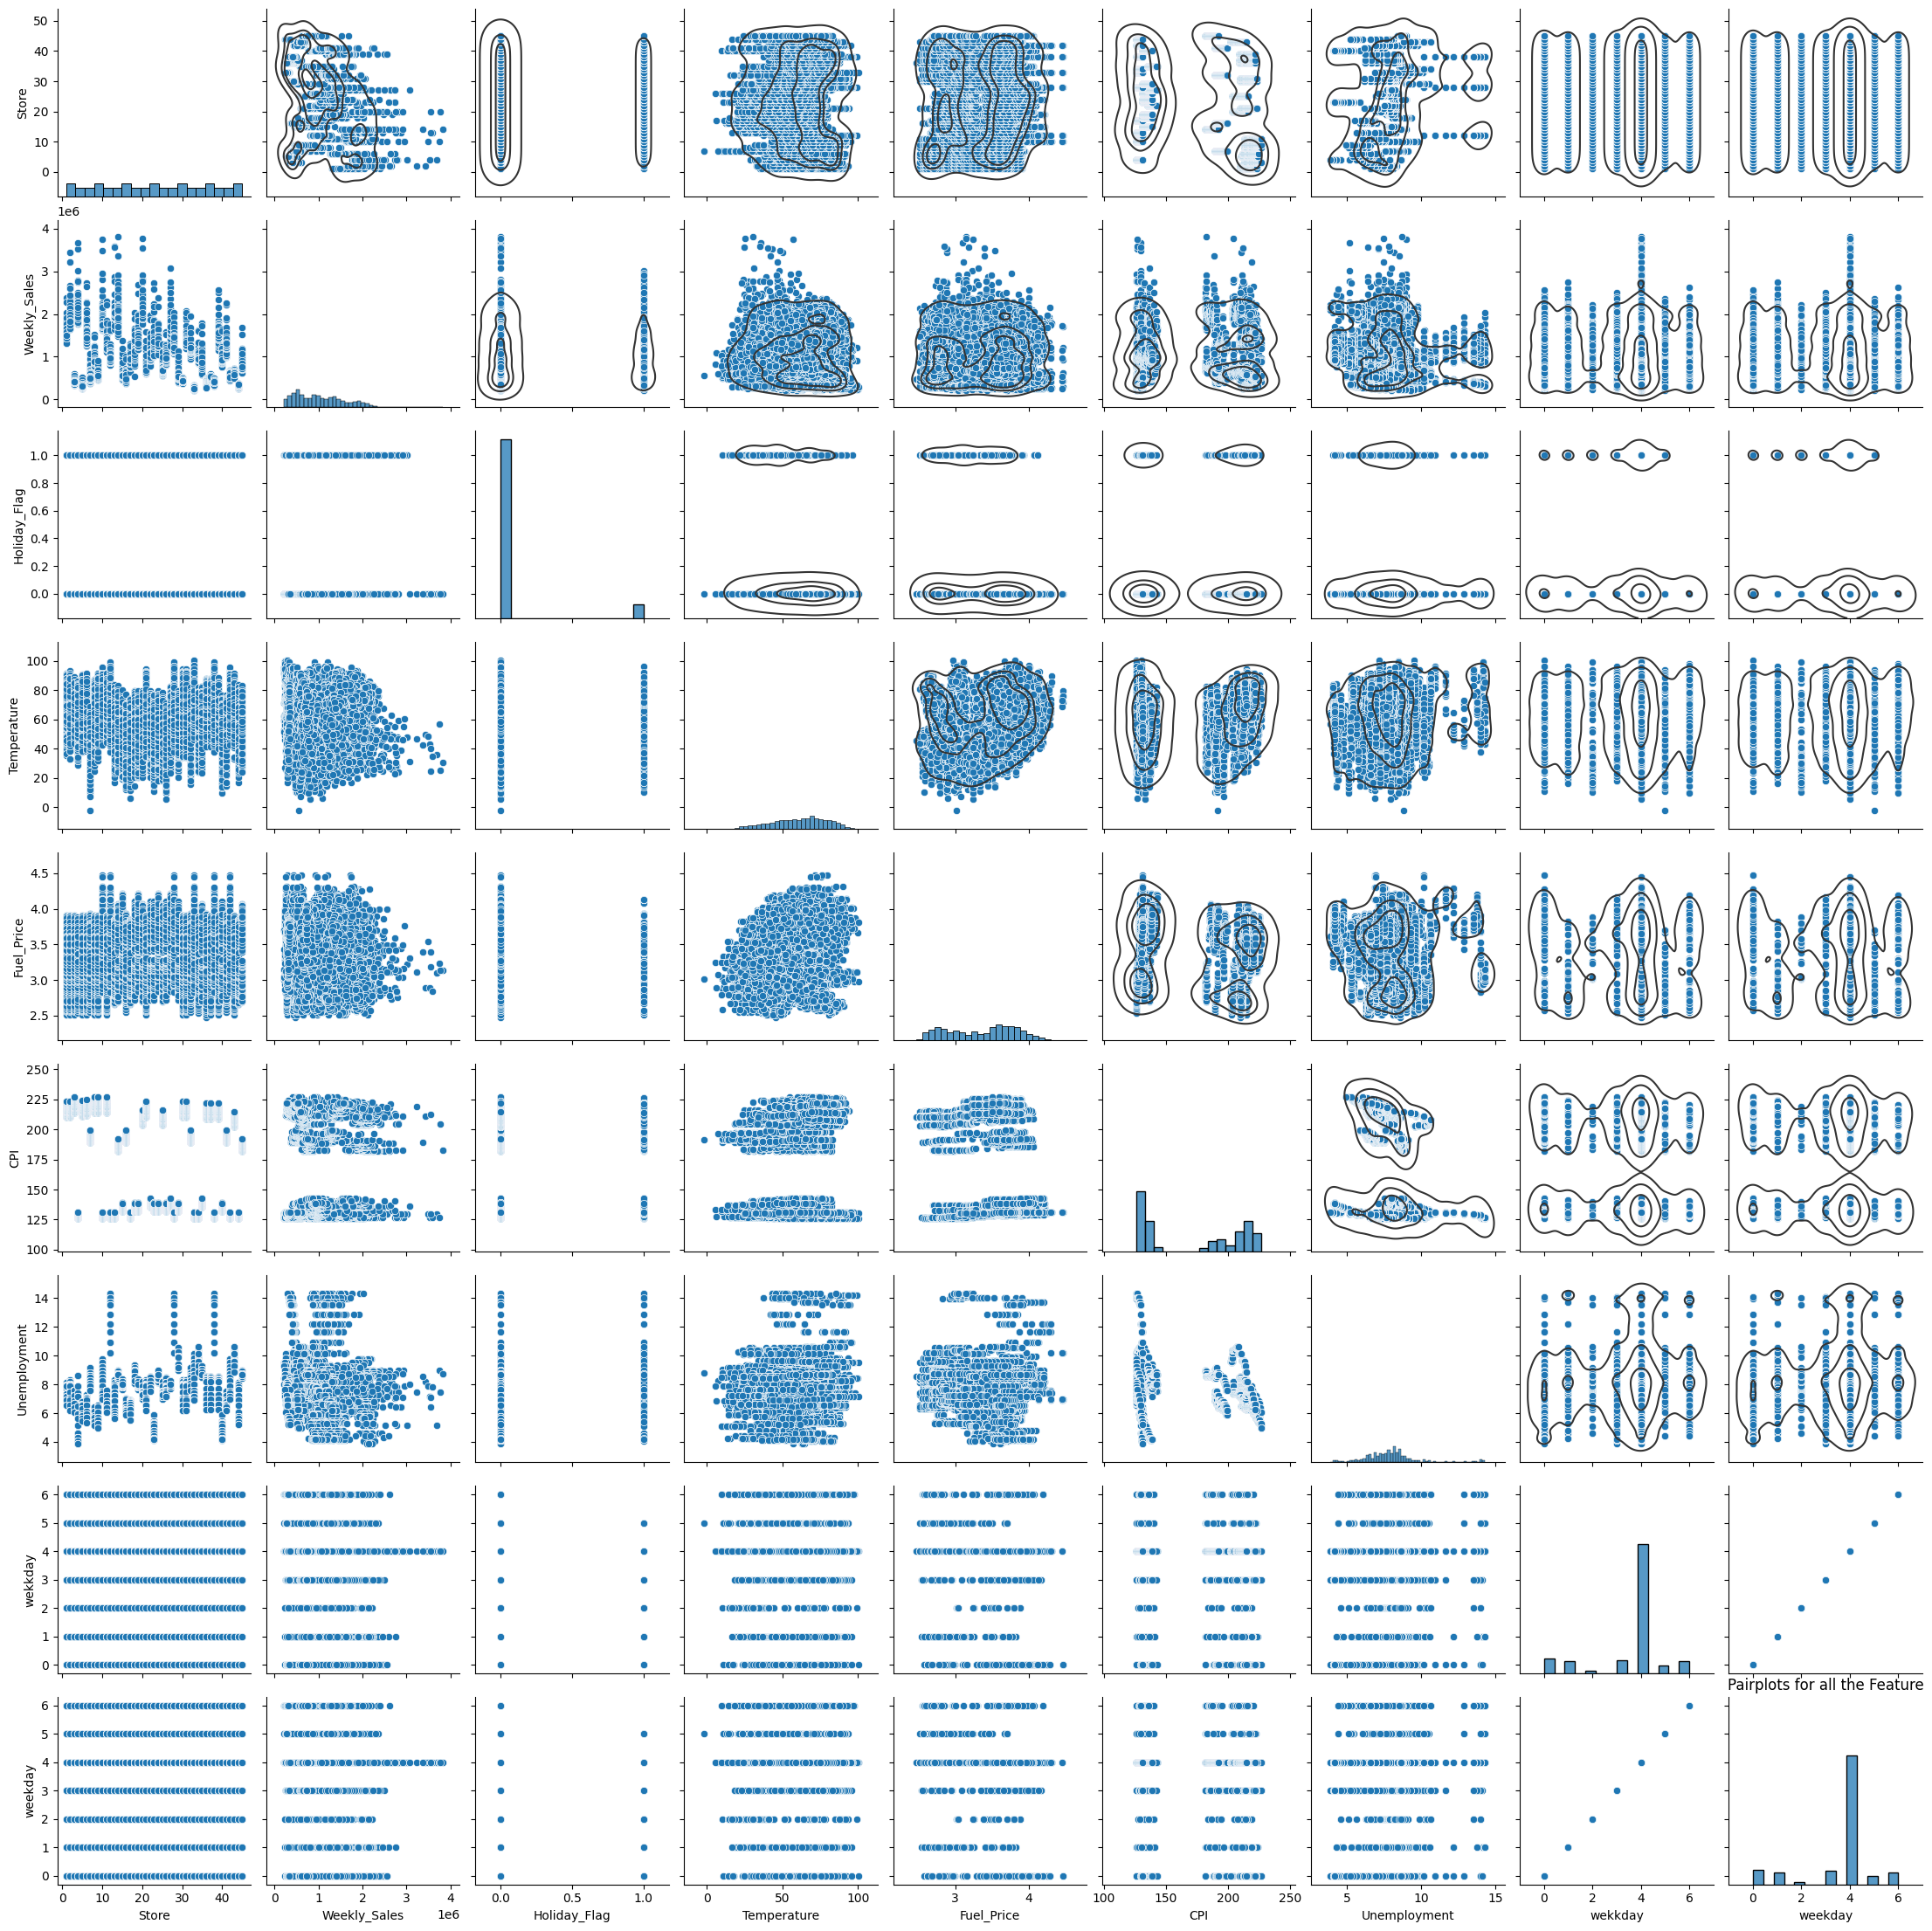

In [46]:
g = sns.pairplot(raw)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

In [51]:
nvc = pd.DataFrame(raw.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/raw.shape[0],3)*100

In [52]:
nvc

,Total Null Values,Percentage
Store,0,0.0
Date,0,0.0
Weekly_Sales,0,0.0
Holiday_Flag,0,0.0
Temperature,0,0.0
Fuel_Price,0,0.0
CPI,0,0.0
Unemployment,0,0.0
Year,0,0.0
Month,0,0.0


In [53]:
ecc = nvc[nvc.Percentage!=0.0].index.values

In [54]:
ecc

array([], dtype=object)

In [75]:
numerical = []
categorical = []
features = [x for x in raw.columns if x != "Weekly_Sales"]
nunique = raw.nunique().sort_values()
for i in range(raw[features].shape[1]):
    if nunique.values[i]<=45:categorical.append(nunique.index[i])
    else: numerical.append(nunique.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(numerical),len(categorical)))


Inference: The Datset has 5 numerical & 5 categorical features.


In [76]:
nunique

Holiday_Flag       2
Year               3
weekday            7
Month             12
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

In [77]:
numerical

['Date', 'Unemployment', 'Fuel_Price', 'CPI', 'Temperature']

In [78]:
categorical

['Holiday_Flag', 'Year', 'weekday', 'Month', 'Store']

In [73]:
raw = raw.drop(columns=['wekkday'])

In [85]:
i

'Store'

In [94]:
preprocessedDf = raw.copy()
pd.concat([preprocessedDf.drop([i], axis=1), pd.DataFrame(pd.get_dummies(preprocessedDf[i], drop_first=True, prefix=str(i)))],axis=1)

           Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0    2010-05-02    1643690.90             0        42.31       2.572   
1    2010-12-02    1641957.44             1        38.51       2.548   
2    2010-02-19    1611968.17             0        39.93       2.514   
3    2010-02-26    1409727.59             0        46.63       2.561   
4    2010-05-03    1554806.68             0        46.50       2.625   
...         ...           ...           ...          ...         ...   
6430 2012-09-28     713173.95             0        64.88       3.997   
6431 2012-05-10     733455.07             0        64.89       3.985   
6432 2012-12-10     734464.36             0        54.47       4.000   
6433 2012-10-19     718125.53             0        56.47       3.969   
6434 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Year Month  weekday  
0     211.096358         8.106  2010    02        6  
1     211.242170         8.

In [95]:
preprocessedDf = raw.copy()
ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in categorical if i not in ecc]
oh=True
dm=True
for i in fcc:
    if preprocessedDf[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        preprocessedDf[i]=pd.get_dummies(preprocessedDf[i], drop_first=True, prefix=str(i))
    if (preprocessedDf[i].nunique()>2):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        preprocessedDf = pd.concat([preprocessedDf.drop([i], axis=1), pd.DataFrame(pd.get_dummies(preprocessedDf[i], drop_first=True, prefix=str(i)))],axis=1)
preprocessedDf.shape

One-Hot Encoding on features:
Holiday_Flag

Dummy Encoding on features:
Year
weekday
Month
Store


(6435, 70)

In [106]:
outliersdf = preprocessedDf.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = numerical

for i in features1:
    Q1 = raw[i].quantile(0.25)
    Q3 = raw[i].quantile(0.75)
    IQR = Q3 - Q1
    print(Q1, Q3, IQR, (Q3+(1.5*IQR)), (Q1-(1.5*IQR)))
    raw = raw[raw[i] <= (Q3+(1.5*IQR))]
    raw = raw[raw[i] >= (Q1-(1.5*IQR))]
    raw = raw.reset_index(drop=True)
display(raw.head())

2010-10-09 00:00:00 2012-02-17 00:00:00 496 days 00:00:00 2014-03-02 00:00:00 2008-09-25 00:00:00
6.891 8.488 1.5969999999999995 10.883499999999998 4.495500000000001
2.885 3.717 0.8320000000000003 4.965000000000001 1.6369999999999993
132.8170968 213.85979585 81.04269905000001 335.423844425 11.253048224999986
46.785 74.37 27.585000000000008 115.74750000000002 5.407499999999985


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03,0


In [101]:
raw[i].quantile(0.25)

46.785

In [102]:
raw[i].quantile(0.75)

74.37

In [108]:
preprocessedDf.head()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year_2011,Year_2012,weekday_1,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
outliersdf = preprocessedDf.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = numerical

for i in features1:
    Q1 = outliersdf[i].quantile(0.25)
    Q3 = outliersdf[i].quantile(0.75)
    IQR = Q3 - Q1
    print(Q1, Q3, IQR, (Q3+(1.5*IQR)), (Q1-(1.5*IQR)))
    outliersdf = outliersdf[outliersdf[i] <= (Q3+(1.5*IQR))]
    outliersdf = outliersdf[outliersdf[i] >= (Q1-(1.5*IQR))]
    outliersdf = outliersdf.reset_index(drop=True)

2010-10-12 00:00:00 2012-03-02 00:00:00 507 days 00:00:00 2014-04-01 12:00:00 2008-09-11 12:00:00
6.891 8.622 1.7309999999999999 11.218499999999999 4.2945
2.891 3.72 0.8290000000000002 4.963500000000001 1.6474999999999997
132.7619333 213.7646401 81.0027068 335.2687003 11.257873100000012
46.7575 74.66 27.902499999999996 116.51374999999999 4.903750000000009


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03,0


In [114]:
outliersdf.shape

(5953, 70)

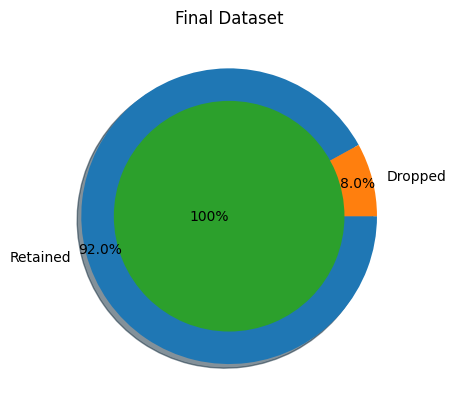


Inference: After the cleanup process, -560 samples were dropped, while retaining -9.53% of the data.


In [128]:
df = preprocessedDf.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], df.shape[0]-raw.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {raw.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(raw.shape[0])),2)}% of the data.')

In [138]:
preprocessedDf

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year_2011,Year_2012,weekday_1,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6431,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6432,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6433,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [140]:
std = StandardScaler()

In [145]:
X = outliersdf.drop(['Weekly_Sales', 'Date'],axis=1)
y = outliersdf['Weekly_Sales']

In [146]:
Xtrain, Xtest, yTrain, yTest = train_test_split(X,y, test_size=0.2)

In [147]:
xTrainScaled = std.fit_transform(Xtrain)
xTestScaled = std.fit_transform(Xtest)

In [153]:
LR = LinearRegression()

In [154]:
LR.fit(xTrainScaled, yTrain)

LinearRegression()

In [155]:
LR.score(xTestScaled, yTest)

0.9143691502683148

In [157]:
lrPreds = LR.predict(xTestScaled)

In [164]:
xgboost = XGBRegressor()

In [165]:
xgboost = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [167]:
xgboost.fit(xTrainScaled, yTrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False, eta=0.1,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.100000001, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=7, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

In [168]:
xgboost.score(xTestScaled, yTest)

0.953585409398321

In [171]:
mean_absolute_error(lrPreds, yTest)

108239.66265080677

In [174]:
import math

In [175]:
math.sqrt(mean_squared_error(yTest, lrPreds))

171071.5874957019

In [179]:
raw.to_excel('../Data/walmartprocessed.xlsx')

In [183]:
raw.describe()

In [192]:
raw.describe().iloc[:8]['Weekly_Sales']

count    5.875000e+03
mean     1.048269e+06
std      5.715927e+05
min      2.099862e+05
25%      5.528985e+05
50%      9.475524e+05
75%      1.433803e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

In [194]:
3.818686e+06 - 2.099862e+05

3608699.8